In [369]:
#repo https://github.com/CVandermies/AI_introduction

import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import ticker

#1
df = pd.read_csv('pokemon_data.csv')
print(df.head())

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  


In [370]:
#2
s_names = df.iloc[:,1]
print("\nNames column as a Series: \n")
print(s_names,type(s_names))


Names column as a Series: 

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object <class 'pandas.core.series.Series'>


In [371]:
#3 
max_HP_index = df["HP"].idxmax()
print("The max HP index is: ",max_HP_index)
max_HP_Pokemon = df["Name"].iloc[max_HP_index]
print("This corresponds to: ",max_HP_Pokemon)

The max HP index is:  261
This corresponds to:  Blissey


In [372]:
#4
df["Atk Tot"] = df["Attack"] + df["Sp. Atk"]
df["Def Tot"] = df["Defense"] + df["Sp. Def"]
print(df.head())

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  Atk Tot  Def Tot  
0       65     45           1      False      114      114  
1       80     60           1      False      142      143  
2      100     80           1      False      182      183  
3      120     80           1      False      222      243  
4       50     65           1      False      112       93  


In [373]:
#5
fire_df = df[df["Type 1"] == "Fire"]
print(fire_df)

       #                       Name Type 1    Type 2   HP  Attack  Defense  \
4      4                 Charmander   Fire       NaN   39      52       43   
5      5                 Charmeleon   Fire       NaN   58      64       58   
6      6                  Charizard   Fire    Flying   78      84       78   
7      6  CharizardMega Charizard X   Fire    Dragon   78     130      111   
8      6  CharizardMega Charizard Y   Fire    Flying   78     104       78   
42    37                     Vulpix   Fire       NaN   38      41       40   
43    38                  Ninetales   Fire       NaN   73      76       75   
63    58                  Growlithe   Fire       NaN   55      70       45   
64    59                   Arcanine   Fire       NaN   90     110       80   
83    77                     Ponyta   Fire       NaN   50      85       55   
84    78                   Rapidash   Fire       NaN   65     100       70   
135  126                     Magmar   Fire       NaN   65      9

In [374]:
#6
s_mega = df[s_names.str.contains("Mega")]["Name"]
print(s_mega,type(s_mega))

3          VenusaurMega Venusaur
7      CharizardMega Charizard X
8      CharizardMega Charizard Y
12       BlastoiseMega Blastoise
19         BeedrillMega Beedrill
23           PidgeotMega Pidgeot
71         AlakazamMega Alakazam
87           SlowbroMega Slowbro
102            GengarMega Gengar
124    KangaskhanMega Kangaskhan
137            PinsirMega Pinsir
141        GyaradosMega Gyarados
154    AerodactylMega Aerodactyl
163          MewtwoMega Mewtwo X
164          MewtwoMega Mewtwo Y
168                     Meganium
196        AmpharosMega Ampharos
224          SteelixMega Steelix
229            ScizorMega Scizor
232      HeracrossMega Heracross
248        HoundoomMega Houndoom
268      TyranitarMega Tyranitar
275        SceptileMega Sceptile
279        BlazikenMega Blaziken
283        SwampertMega Swampert
306      GardevoirMega Gardevoir
327          SableyeMega Sableye
329            MawileMega Mawile
333            AggronMega Aggron
336        MedichamMega Medicham
339      M

In [375]:
#7
atk_mean = df["Attack"].mean()
def_mean = df["Defense"].mean()

strong_bool = (df['Attack']>=atk_mean) & (df['Defense']>=def_mean)
weak_bool = (df['Attack']<atk_mean) & (df['Defense']<def_mean)

df.loc[strong_bool, "Rank"] = "Strong"
df.loc[weak_bool, "Rank"] = "Weak"
df["Rank"] = df["Rank"].fillna("Standard")
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Atk Tot,Def Tot,Rank
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,114,114,Weak
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,142,143,Weak
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,182,183,Strong
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,222,243,Strong
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,112,93,Weak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,200,300,Strong
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,320,220,Strong
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,260,190,Standard
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,330,190,Standard


In [376]:
#8
s_types_count = df["Type 1"].value_counts()
print(s_types_count, type(s_types_count))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Ground       32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64 <class 'pandas.core.series.Series'>


In [377]:
#9.1
df2 = pd.read_csv("titanic3.csv", sep=';', decimal=',')

#male
df_male = df2[(df2["sex"] == "male")]
male_count = df_male["sex"].count()
male_survived = df_male[df_male["survived"] == 1].count()["survived"]
male_rate = round(male_survived / male_count, 4)*100
 
#female
df_female = df2[(df2["sex"] == "female")]
female_count = df_female["sex"].count()
female_survived = df_female[df_female["survived"] == 1].count()["survived"]
female_rate = round(female_survived / female_count, 4)*100

print("{0} sur {1} hommes ont survécu. Cela correspond à un taux de {2}%.".format(male_survived, male_count, male_rate))
print("{0} sur {1} femmes ont survécu. Cela correspond à un taux de {2}%.".format(female_survived, female_count, female_rate))

#EDIT : après avoir un peu galéré en fait c'est juste :

df2.groupby('sex')['survived'].mean()

161 sur 843 hommes ont survécu. Cela correspond à un taux de 19.1%.
339 sur 466 femmes ont survécu. Cela correspond à un taux de 72.75%.


sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

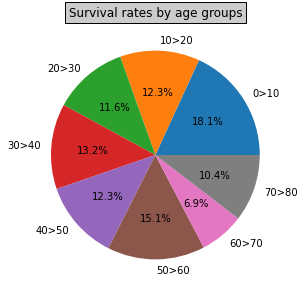

In [378]:
#9.2

df2["age"] = df2["age"].dropna()
df_age_1 = df2[(df2["age"] > 0) & (df2["age"] <= 10)]
df_age_2 = df2[(df2["age"] > 10) & (df2["age"] <= 20)]
df_age_3 = df2[(df2["age"] > 20) & (df2["age"] <= 30)]
df_age_4 = df2[(df2["age"] > 30) & (df2["age"] <= 40)]
df_age_5 = df2[(df2["age"] > 40) & (df2["age"] <= 50)]
df_age_6 = df2[(df2["age"] > 50) & (df2["age"] <= 60)]
df_age_7 = df2[(df2["age"] > 60) & (df2["age"] <= 70)]
df_age_8 = df2[(df2["age"] > 70) & (df2["age"] <= 80)]

r1 = df_age_1['survived'].mean()
r2 = df_age_2['survived'].mean()
r3 = df_age_3['survived'].mean()
r4 = df_age_4['survived'].mean()
r5 = df_age_5['survived'].mean()
r6 = df_age_6['survived'].mean()
r7 = df_age_7['survived'].mean()
r8 = df_age_8['survived'].mean()

groups = ['0>10','10>20','20>30','30>40','40>50','50>60','60>70','70>80']
slices = [r1,r2,r3,r4,r5,r6,r7,r8]
plt.pie(slices, labels = groups, shadow = False, radius = 1.2, autopct = '%1.1f%%')
plt.title("Survival rates by age groups", bbox={'facecolor':'0.8'},pad=30)
plt.show()

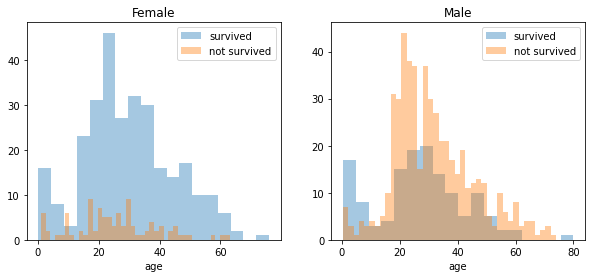

In [379]:
#9.3

"""Les précédents résultats confirment le dicton. Les femmes ont survécu en écrasante majorité par rapport aux hommes. Dans le graphe circulaire ci dessus, on peut voir que la catégorie la plus sauvée est celle des 0 à 10 ans.

Ci-dessous, un graphe encore plus parlant car il regroupe ces deux critères. On peut notamment y voir chez le sexe masculin que la tranche des enfants (0 à 10 ans) est la seule qui compte en moyenne plus de survivants que de morts."""

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df2[df2['sex']=='female']
men = df2[df2['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')